In [1]:
import sys
!{sys.executable} -m pip install tensorflow
# Just some imports
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

  Using cached https://files.pythonhosted.org/packages/22/c6/d08f7c549330c2acc1b18b5c1f0f8d9d2af92f54d56861f331f372731671/tensorflow-1.8.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1f/ea/664c589ec41b9e9ac6e20cc1fe9016f3913332d0dc5498a5d7771e2835af/grpcio-1.12.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/81/30/e935244ca6165187ae8be876b6316ae201b71485538ffac1d718843025a9/wheel-0.31.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bfa78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b2/91/cc9805f1ff7b49f620136b3a7ca26f6a1be2ed424606804b0fbcf499f712/astor-0.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4b/3d/9c0a34ad8544abef864714840fb8954d630b04433f00881bc8fde7b2ab27/numpy-1.14.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://fil

# MNIST dataset

MNIST is a large database of handwritten digits that is commonly used for training various image processing systems.

The MNIST database consists of 70000 grayscale digits, where each digit is an image with a size of 28x28 pixels.

The datased is splitted into three subsets:


1. Train set -- 55k images
2. Test set -- 10k images
3. Validation set -- 5k images


TensorFlow package has already built-in functions to deal with the MNIST dataset. Below one can find how to use it.


In [2]:
# Function for plotting the MNIST images
def plot(image):
    plt.axis('off')
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.show()

In [3]:
# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Now we can easily deal with the MNIST data, by using:


1. mnist.train.images
2. mnist.test.images
3. mnist.validation.images

In [4]:
# Print the shapes of images from each subset
print ("IMAGES:")
print (mnist.train.images.shape)
print (mnist.test.images.shape)
print (mnist.validation.images.shape)

# Print the shapes of labels from each subset
print ("LABELS:")
print (mnist.train.labels.shape)
print (mnist.test.labels.shape)
print (mnist.validation.labels.shape)

IMAGES:
(55000, 784)
(10000, 784)
(5000, 784)
LABELS:
(55000, 10)
(10000, 10)
(5000, 10)


As we can see, every image is now a 784 dimensional vector, as by default it is reshaped from the matrix of a size 28x28 pixels.

Also we see that labels are 10 dimensional vectors, what is caused by the fact that they are in one-hot-encoding form.

In [5]:
# Print the vector of sample training image
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

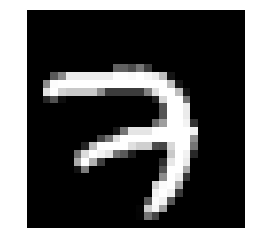

In [6]:
# Plot the sample training image
plot(mnist.train.images[0])

In [7]:
# Print the label of sample training image
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Introduction to TensorFlow

TensorFlow is popular open-source deep learning library developed by Google.

\\

TensorFlow uses a dataflow graph to represent your computation in terms of the dependencies between individual operations. 

A computational graph is a series of TensorFlow operations arranged into a graph. The graph is composed of two types of objects:


*   Operations (or "ops"): The nodes of the graph. Operations describe calculations that consume and produce tensors.
*   Tensors: The edges in the graph. These represent the values that will flow through the graph.

\\

This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices.

Dataflow has several advantages that TensorFlow leverages when executing your programs:


*   Parallelism
*   Distributed execution
*   Compilation
*   Portability

\\

We highly recommend to read the resources from the [following link](https://www.tensorflow.org/programmers_guide/), to understand the TF architecture.

## Session initialization

To evaluate tensors, instantiate a tf.Session object, informally known as a session. A session encapsulates the state of the TensorFlow runtime, and runs TensorFlow operations. If a tf.Graph is like a .py file, a tf.Session is like the python executable.

In [8]:
sess = tf.InteractiveSession()

## Tensor

TensorFlow, is a framework to define and run computations involving tensors. A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes.

\\

TensorFlow programs work by first building a graph of tf.Tensor objects, detailing how each tensor is computed based on the other available tensors and then by running parts of this graph to achieve the desired results.

\\

tf.Tensor does not exist outside the context of a single session.run call.

### Initialization

In [9]:
node1 = tf.constant(3.0)
node2 = tf.constant(4, dtype=tf.int32)
node3 = tf.constant(0., name="Zero_tensor")
node4 = tf.constant([1., 2., 3.])
node5 = tf.constant([[1., 2., 3.], [4., 5., 6.]])
node6 = tf.ones([3, 3, 3])

In [10]:
print(node1)
print(type(node1))
print()

print(node2.eval())
print(sess.run(node2))
print()

print(node3.name)
print()

print(node4.shape)
print()

print(node5.eval())
print()

print(node6)
print(sess.run(node6))

Tensor("Const:0", shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>

4
4

Zero_tensor:0

(3,)

[[1. 2. 3.]
 [4. 5. 6.]]

Tensor("ones:0", shape=(3, 3, 3), dtype=float32)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


### Operations

In [11]:
x = tf.constant(2.)
y = tf.constant(3.)

add_1 = x + y
add_2 = tf.add(x, y, name='our_add_node')

print(add_1)
print(add_1.eval())
print()

print(add_2)
print(add_2.eval())

Tensor("add:0", shape=(), dtype=float32)
5.0

Tensor("our_add_node:0", shape=(), dtype=float32)
5.0


In [12]:
x = tf.constant(2.)
y = tf.constant([3., 4., 5.])

add_3 = x + y

print(add_3)
print(add_3.eval())

Tensor("add_1:0", shape=(3,), dtype=float32)
[5. 6. 7.]


In [13]:
xx = tf.random_normal(shape=(100, 10), name='xx')
yy = tf.random_normal(shape=(10, 2), name='yy')

xyxy = tf.matmul(xx, yy)

print(xyxy)

Tensor("MatMul:0", shape=(100, 2), dtype=float32)


### Tensor does not exist outside the context of a single session.run call

The result shows a different random value on each call to run, but a consistent value during a single run (out1 and out2 receive the same random input):

In [14]:
vec = tf.random_uniform(shape=(3,))
out1 = vec + 1
out2 = vec + 2

print(sess.run(vec))
print(sess.run(vec))
print(sess.run((out1, out2)))

[0.32856107 0.76389205 0.45400012]
[0.85200894 0.9873638  0.9982232 ]
(array([1.8682148, 1.9791001, 1.5944145], dtype=float32), array([2.8682148, 2.9791002, 2.5944145], dtype=float32))


### Placeholders

A placeholder represents an entry point for us to feed actual data values
into tensors. It is not initialized and contains no data. A placeholder
generates an error if it is executed without a feed.

#### Placeholder for a single number

In [15]:
x = tf.placeholder(tf.float32, shape=[1,1])
y = tf.matmul(x, x)

In [16]:
""" A placeholder generates an error if it is executed without a feed """
print(sess.run(y))  # ERROR: will fail because x was not fed.

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [1,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[1,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python3/dist-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 760, in _run_callback
    ret = callback()
  File "/usr/lib/python3/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/usr/lib/python3/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-ec0731bab3f8>", line 1, in <module>
    x = tf.placeholder(tf.float32, shape=[1,1])
  File "/home/karolinka/.local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/karolinka/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/karolinka/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/karolinka/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/karolinka/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [1,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[1,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [17]:
number = [[3.]]
print(sess.run(y, feed_dict={x: number}))  # Will succeed.

[[9.]]


#### Placeholder for a tensor with undefined length

In [18]:
x = tf.placeholder(tf.float32, shape=[None, 5])
y = x * 2

In [19]:
tensor = np.ones((1, 5))
print(tensor)
print()
print(sess.run(y, feed_dict={x: tensor}))

[[1. 1. 1. 1. 1.]]

[[2. 2. 2. 2. 2.]]


#### Operations on placeholders

In [20]:
x = tf.placeholder(tf.float32, shape=[1, None])
y = tf.placeholder(tf.float32, shape=[1, None])

z_1 = x + y
z_2 = tf.matmul(x, tf.transpose(y))

In [21]:
x_tensor = [[1., 2., 3.]]
y_tensor = [[11., 12., 13.]]
print(sess.run(z_1, feed_dict={x: x_tensor, y: y_tensor}))
print()
print(sess.run(z_2, feed_dict={x: x_tensor, y: y_tensor}))

[[12. 14. 16.]]

[[74.]]


## Variable

A TensorFlow variable is the best way to represent the state manipulated
by your program. A tf.Variable represents a tensor whose value can be
changed by running ops on it.
Internally, a tf.Variable stores a tensor. Specific ops allow you to read and
modify the values of this tensor.

\\

Unlike tf.Tensor objects, a tf.Variable exists outside the context of a single session.run call.

In [22]:
var_1 = tf.get_variable("var_1", shape=[2, 3]) # default type tf.float32, default init tf.glorot_uniform_initializer
var_2 = tf.get_variable("var_2", shape=[5], initializer=tf.constant_initializer(1000.))
var_3 = tf.get_variable("var_3", shape=[3, 3, 3], initializer=tf.initializers.random_normal())

var_4 = tf.Variable(tf.constant(3., shape=[1, 2]))
var_5 = tf.Variable(tf.random_normal([2, 1]))
var_6 = tf.Variable(tf.random_uniform([1, 1]), name="var_6")

In [23]:
""" Before you can use a variable, it must be initialized!!! """
print(var_1)
print(var_1.eval()) # ERROR: will fail because variables are not initialized!

<tf.Variable 'var_1:0' shape=(2, 3) dtype=float32_ref>


FailedPreconditionError: Attempting to use uninitialized value var_1
	 [[Node: _retval_var_1_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](var_1)]]

In [24]:
""" Before you can use a variable, it must be initialized!!! """
sess.run(tf.global_variables_initializer())

In [25]:
print(var_1)
print(var_1.eval())
print()

print(var_2)
print(var_2.eval())
print()

print(var_3)
print(sess.run(var_3))
print()

print(var_4)
print(sess.run(var_4))
print()

print(var_5)
print(sess.run(var_5))
print()

print(var_6)
print(var_6.eval())
print()

<tf.Variable 'var_1:0' shape=(2, 3) dtype=float32_ref>
[[ 0.6339016  -0.85074687 -0.40628666]
 [-0.13980776  1.0913789   0.1443994 ]]

<tf.Variable 'var_2:0' shape=(5,) dtype=float32_ref>
[1000. 1000. 1000. 1000. 1000.]

<tf.Variable 'var_3:0' shape=(3, 3, 3) dtype=float32_ref>
[[[ 0.173098   -0.7522116   0.53066134]
  [ 0.36987022  0.94048494 -0.71320784]
  [ 1.9105393   0.7954687  -0.44640672]]

 [[-0.9223671  -0.8734648   0.36734757]
  [-0.68438435  0.19258565 -2.2917182 ]
  [-0.02112285  1.7471564  -0.9517774 ]]

 [[ 2.4070487  -0.33092928 -0.82059413]
  [ 0.40101963 -1.0287039  -0.24965385]
  [-0.12046738  0.33668953 -1.3680288 ]]]

<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32_ref>
[[3. 3.]]

<tf.Variable 'Variable_1:0' shape=(2, 1) dtype=float32_ref>
[[-2.6204815 ]
 [-0.51063406]]

<tf.Variable 'var_6:0' shape=(1, 1) dtype=float32_ref>
[[0.98330724]]



### Variable exists outside the context of a single session.run call

In [26]:
vec = tf.get_variable("vec", shape=(3,), initializer=tf.initializers.random_normal())
sess.run(tf.global_variables_initializer())
out1 = vec + 1
out2 = vec + 2

print(sess.run(vec))
print(sess.run(vec))
print(sess.run((out1, out2)))

[ 0.9746403  0.8640773 -1.0308193]
[ 0.9746403  0.8640773 -1.0308193]
(array([ 1.9746404,  1.8640773, -0.0308193], dtype=float32), array([2.9746404, 2.8640773, 0.9691807], dtype=float32))


### Computing gradients

In [27]:
var_7 = tf.matmul(var_4, var_5)

In [28]:
g = tf.gradients(var_7, [var_4, var_5])
print(g)
print(g[0].eval())
print(g[1].eval())

[<tf.Tensor 'gradients/MatMul_3_grad/MatMul:0' shape=(1, 2) dtype=float32>, <tf.Tensor 'gradients/MatMul_3_grad/MatMul_1:0' shape=(2, 1) dtype=float32>]
[[1.0435681 0.6223902]]
[[3.]
 [3.]]


In [29]:
x_1 = tf.constant(2., shape=[2,1])
x_2 = tf.constant(3., shape=[1,2])
y = tf.matmul(x_1, x_2)

g = tf.gradients(y, [x_1, x_2])
print(g)
print(g[0].eval())
print(g[1].eval())

[<tf.Tensor 'gradients_1/MatMul_4_grad/MatMul:0' shape=(2, 1) dtype=float32>, <tf.Tensor 'gradients_1/MatMul_4_grad/MatMul_1:0' shape=(1, 2) dtype=float32>]
[[6.]
 [6.]]
[[4. 4.]]


## Optimizers

In TensorFlow one can use fast, efficient gradient optimizers to minimize the given function. \\
In the following example we will show how to use optimizers in TF, by minimizing x^2 function, with using of the Gradient Decent Optimizer. 

#### Defining the starting point x and the function y = x^2

Notice, that the starting point should be initialized as a variable, not a tensor, as the optimizer have to change its value, by repeatedly subtracting the gradient of function in order to minimize y value.

In [30]:
x = tf.get_variable("opt_x", dtype=tf.float32, initializer=tf.constant_initializer(1000.), shape=[1, 1])
y = tf.pow(x, [2.])

#### Defining the Gradient Descent Optimizer

In [31]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(y)

#### Iterate to minimize function

In [32]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print("x = ", x.eval())
  print("y = ", y.eval())
  for i in range(200):
      train_step.run()
      if i % 10 == 0:
        print(x.eval())

x =  [[1000.]]
y =  [[1000000.]]
[[800.]]
[[85.89934]]
[[9.2233715]]
[[0.99035203]]
[[0.10633824]]
[[0.01141798]]
[[0.001226]]
[[0.00013164]]
[[1.4134782e-05]]
[[1.5177106e-06]]
[[1.6296293e-07]]
[[1.7498012e-08]]
[[1.8788346e-09]]
[[2.0173833e-10]]
[[2.1661489e-11]]
[[2.3258847e-12]]
[[2.4973995e-13]]
[[2.6815621e-14]]
[[2.8793051e-15]]
[[3.0916303e-16]]


In [33]:
""" Optimizer needs variables that can be mutated in order to minimize a function! """
x = tf.constant(1000.)
y = tf.pow(x, [2.])

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(y) # ERROR: there are no gradients provided for any variable!

ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'var_1:0' shape=(2, 3) dtype=float32_ref>", "<tf.Variable 'var_2:0' shape=(5,) dtype=float32_ref>", "<tf.Variable 'var_3:0' shape=(3, 3, 3) dtype=float32_ref>", "<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32_ref>", "<tf.Variable 'Variable_1:0' shape=(2, 1) dtype=float32_ref>", "<tf.Variable 'var_6:0' shape=(1, 1) dtype=float32_ref>", "<tf.Variable 'vec:0' shape=(3,) dtype=float32_ref>", "<tf.Variable 'opt_x:0' shape=(1, 1) dtype=float32_ref>"] and loss Tensor("Pow_1:0", shape=(1,), dtype=float32).

# Softmax regression for MNIST classification

Example of the softmax regression applied to MNIST digits classification. 

## Building the softmax architecture

#### Create placeholders for training data. 

Remember about a propper shape of training images (in mnist.train.images every digit is a 784D vector) and labels (In training dataset labels are in one-hot-encoding form).

In [34]:
x = tf.placeholder(tf.float32, [None, 784])
y_labels = tf.placeholder(tf.float32, [None,10])



#### Initialize weight matrix and biases vector

In [35]:
W = tf.get_variable("softmax_W", dtype=tf.float32, initializer=tf.initializers.truncated_normal(stddev=0.05), shape=np.array([784, 10]))
b = tf.get_variable("softmax_b",dtype=tf.float32,initializer=tf.constant_initializer(0.2), shape=np.array([10]))
#W = tf.get_variable("softmax_W", dtype=tf.float32, initializer=tf.initializers.truncated_normal(stddev=0.05), shape=[784, 10])

#### Define classificator

Multiply input image by a weighr matrix, them add biases and apply softmax function.

In [36]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Softmax training

We will now train the softmax classifier. For this purpose we have to define the loss function, cross entropy in this example and optimizer, we will use Adam.

#### Define the loss function

Here we define the cross entropy loss function by hand, but one should notice, that better option is to use the tf.nn.softmax_cross_entropy_with_logits_v2 function, as this is more numerically stable solution (as we are taking the log of softmax).

In [37]:
cross_entropy = -tf.reduce_sum(input_tensor=y_labels*tf.log(y),reduction_indices=[1]) 
#cross_entropy=-tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_labels, logits=y))
cross_entropy = tf.reduce_mean(cross_entropy)

#### Define the optimizer 

In [38]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

#### Check whether softmax classifier returns correct predictions and calculate the accuracy

In [39]:
""" Create a vector that tells us, whether the predictions from our net - y_conv
    are equal to the correct digit labels - y. """
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_labels, 1))
correct_prediction = tf.cast(correct_prediction, tf.float32)

""" Calculate the accurracy of correct predictions """
accuracy = tf.reduce_mean(correct_prediction)

#### Training the network

The following code will train our network with using of our predefined SGD optimizer, based on the batch size equal to 64 and with 2000 steps.

In [40]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(2000):
    # Get the batch with 64 images from the MNIST training set
    batch = mnist.train.next_batch(64)

    # Fill data into placeholders and run the training step
    train_step.run(feed_dict={x: batch[0], y_labels: batch[1]})

    # Print the validation accuracy every 100 steps
    if i % 100 == 0:
      validation_accuracy = accuracy.eval(feed_dict={
          x: mnist.validation.images, y_labels: mnist.validation.labels})
      print('step: {}, validation accuracy: {}'.format(i, round(validation_accuracy, 3)))


  # Print the test set accuracy
  print('test accuracy: {}'.format(round(accuracy.eval(feed_dict={
      x: mnist.test.images, y_labels: mnist.test.labels}), 3)))

step: 0, validation accuracy: 0.11299999803304672
step: 100, validation accuracy: 0.8519999980926514
step: 200, validation accuracy: 0.875
step: 300, validation accuracy: 0.8859999775886536
step: 400, validation accuracy: 0.890999972820282
step: 500, validation accuracy: 0.8970000147819519
step: 600, validation accuracy: 0.902999997138977
step: 700, validation accuracy: 0.902999997138977
step: 800, validation accuracy: 0.9049999713897705
step: 900, validation accuracy: 0.9079999923706055
step: 1000, validation accuracy: 0.9100000262260437
step: 1100, validation accuracy: 0.9079999923706055
step: 1200, validation accuracy: 0.9110000133514404
step: 1300, validation accuracy: 0.9129999876022339
step: 1400, validation accuracy: 0.9120000004768372
step: 1500, validation accuracy: 0.9120000004768372
step: 1600, validation accuracy: 0.9150000214576721
step: 1700, validation accuracy: 0.9160000085830688
step: 1800, validation accuracy: 0.9160000085830688
step: 1900, validation accuracy: 0.9160

# Simple Feed Forward Network for MNIST classification

## Building the network

Exercise:


Create the Fully Connected Feed Forward Network for digits classification, with the following architecture:


1.   First layer, that maps one grayscale image (of size 28x28 = 784 pixels) to 100 hidden neurons.
2.   Second layer, that maps 100 features into another 100 hidden neurons.
3.   Third layer, that maps 100 features into another 100 hidden neurons.
4.   Last layer, that maps 100 features to 10 classes, one for each digit.


In every hidden layer, we should use the ReLU activation function. Softmax should be applied on the last layer of our network.


#### Create placeholders for training data. 

Remember about a propper shape of training images (in mnist.train.images every digit is a 784D vector) and labels (In training dataset labels are in one-hot-encoding form).

In [41]:
""" Create a placeholders for MNIST images and their labels """
x = tf.placeholder(tf.float32, [None, 784])
y_labels = tf.placeholder(tf.float32, [None, 10])

#### Initialize weight matrices and biases for all layers of our network

In [42]:
""" Initialize weights matrix W and biases b for the first hidden layer (matrix should map 784 input features into 100 features) """
W_1 = tf.get_variable("softmax_W1", dtype=tf.float32, initializer=tf.initializers.truncated_normal(stddev=0.05), shape=[784, 100])
b_1 = tf.get_variable("softmax_b1", dtype=tf.float32, initializer=tf.constant_initializer(0.2), shape=[100])

""" Initialize weights matrix W and biases b for the second hidden layer (matrix should map 100 features into 100 features) """
W_2 = tf.get_variable("softmax_W2", dtype=tf.float32, initializer=tf.initializers.truncated_normal(stddev=0.05), shape=[100, 100])
b_2 = tf.get_variable("softmax_b2", dtype=tf.float32, initializer=tf.constant_initializer(0.2), shape=[100])

""" Initialize weights matrix W and biases b for the third hidden layer (matrix should map 100 features into 100 features) """
W_3 = tf.get_variable("softmax_W3", dtype=tf.float32, initializer=tf.initializers.truncated_normal(stddev=0.05), shape=[100, 100])
b_3 = tf.get_variable("softmax_b3", dtype=tf.float32, initializer=tf.constant_initializer(0.2), shape=[100])

""" Initialize weights matrix W and biases b for the output layer (matrix should map 100 features into 10 digits classes) """
W_4 = tf.get_variable("softmax_W4", dtype=tf.float32, initializer=tf.initializers.truncated_normal(stddev=0.05), shape=[100, 10])
b_4 = tf.get_variable("softmax_b4", dtype=tf.float32, initializer=tf.constant_initializer(0.2), shape=[10])

#### Define network operations

In every hidden layer, we should use the ReLU activation function (tf.nn.relu). \\
Softmax should be applied on the last layer of our network (tf.nn.softmax).


In [43]:
""" Define output from the first layer (using W_1 and b_1) """
y = tf.nn.relu(tf.matmul(x, W_1) + b_1)

""" Define output from the second layer (using W_2 and b_2) """
y =  tf.nn.relu(tf.matmul(y, W_2) + b_2)

""" Define output from the third layer (using W_3 and b_3) """
y = tf.nn.relu(tf.matmul(y,W_3) + b_3)

""" Define output from the last layer (using W_4 and b_4) --> this will give us predictions  """
y = tf.nn.softmax(tf.matmul(y, W_4) + b_4)

## Network training

We will now try to train our network. For this purpose we have to define the loss function, cross entropy in this example and optimizer, we will use Adam.

#### Define the loss function and optimizer

This time try to use numerically stable version of softmax, given by a function 'tf.nn.softmax_cross_entropy_with_logits_v2', instead of writing it by hand

In [44]:
""" Define the cross entropy error between true and predicted labels """
cross_entropy=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_labels, logits=y)
#cross_entropy=-tf.reduce_sum(input_tensor=y_labels*tf.log(y),reduction_indices=[1]) 
cross_entropy = tf.reduce_mean(cross_entropy)

In [45]:
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

#### Check whether our network returns correct predictions and calculate the accuracy

In [46]:
""" Create a vector that tells us, whether the predictions from our net - y_conv
    are equal to the correct digit labels - y. """
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_labels, 1))
correct_prediction = tf.cast(correct_prediction, tf.float32)

""" Calculate the accurracy of correct predictions """
accuracy = tf.reduce_mean(correct_prediction)

#### Training the network

The following code will train our network with using of our predefined Adam optimizer, based on the batch size equal to 64 and with 5000 steps.

In [47]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(5000):
    # Get the batch with 64 images from the MNIST training set
    batch = mnist.train.next_batch(64)
    #print(batch_x)
    # Fill data into placeholders
    train_step.run(feed_dict={x: batch[0], y_labels:batch[1]})

    # Print the validation accuracy every 100 steps
    if i % 100 == 0:
      validation_accuracy = accuracy.eval(feed_dict={
          x: mnist.validation.images, y_labels: mnist.validation.labels})
      print('step: {}, validation accuracy: {}'.format(i, round(validation_accuracy, 3)))


  # Print the test set accuracy
  print('test accuracy: {}'.format(round(accuracy.eval(feed_dict={
      x: mnist.test.images, y_labels: mnist.test.labels}), 3)))

step: 0, validation accuracy: 0.10000000149011612
step: 100, validation accuracy: 0.8349999785423279
step: 200, validation accuracy: 0.8920000195503235
step: 300, validation accuracy: 0.8930000066757202
step: 400, validation accuracy: 0.9020000100135803
step: 500, validation accuracy: 0.9049999713897705
step: 600, validation accuracy: 0.925000011920929
step: 700, validation accuracy: 0.9259999990463257
step: 800, validation accuracy: 0.9300000071525574
step: 900, validation accuracy: 0.9330000281333923
step: 1000, validation accuracy: 0.9359999895095825
step: 1100, validation accuracy: 0.9330000281333923
step: 1200, validation accuracy: 0.9300000071525574
step: 1300, validation accuracy: 0.9409999847412109
step: 1400, validation accuracy: 0.9490000009536743
step: 1500, validation accuracy: 0.949999988079071
step: 1600, validation accuracy: 0.9449999928474426
step: 1700, validation accuracy: 0.9490000009536743
step: 1800, validation accuracy: 0.9490000009536743
step: 1900, validation ac

# Convolutional Neural Network for MNIST classification

## Building the network

Exercise:

Create the CNN for digits classification, with the following architecture:


1.   First convolutional layer, that maps one grayscale image to 32 feature maps.
2.   Second convolutional layer, that maps 32 feature maps to 64 feature maps.
3.   Fully connected layer 1, that maps our 64 feature maps into one layer, with 1024 features.
4.   Fully connected layer 2, that maps the 1024 features to 10 classes, one for each digit

Use filters with width and height equal to 5.


#### At the beggining we have to create some auxiliary functions.

In [10]:
def get_weight_variable(shape):
  """
  Write a function, that will return the tf.Variable of specified shape, with
  coefficients initialized by random, sampled from a normal distribution with
  mean = 0 and sd = 0.02
  """
  init = tf.random_normal(shape,mean=0, stddev=0.02)
  return tf.Variable(init)



def conv2d(x, W):
  """
  Write a function, that will return the result of a convolution between
  a tensor x and a weight vector W. We recommend using strides equal to 1
  in every direction and use SAME padding.
  """
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')



def max_pool_2x2(x):
  """
  Write a function, that will return the result of max pooling operation done
  on a tensor x, that will reduce the size of inner image. 
  The length and width of a pooling layer window should be equal to 2.
  """
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                        strides=[1, 2, 2, 1], padding='SAME')

#### Create placeholders for training data.

Remember about a propper shape of training images (in mnist.train.images every digit is a 784D vector) and labels (In training dataset labels are in one-hot-encoding form).

In [11]:
x = tf.placeholder(tf.float32, [None, 784])
y_l = tf.placeholder(tf.float32, [None, 10])

#### Reshape the x vector into a rank 4 tensor with shapes: [batch_size, rows, columnss, colors/filters]. Keep in mind, that we should have 28x28 image, with only one color (as the image is in grayscale) and that batch size will be given later.

In [12]:
x_image = tf.reshape(x, [-1, 28, 28, 1]) # [b_size, rows, cols, colors/filters]

#### Create first convolutional layer, that will map one grayscale image into 32 feature maps. To do so, we will use 32 convolutional filters with sizes 5x5x1.

In [13]:
""" Initialize weights matrix W """
W_conv1 = get_weight_variable([5, 5, 1, 32]) # 32 filters with size 5x5x1

""" Initialize biases vector """
b_conv1 = get_weight_variable([32])

In [14]:
""" Apply convolution operation between image and weights, then add bias and apply relu function """
y = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # [batch_size, 28, 28, 32]
print(x_image.shape)
print(W_conv1.shape)
""" Apply max pooling operation on h_conv1 """
y = max_pool_2x2(y) # [batch_size, 14, 14, 32]

(?, 28, 28, 1)
(5, 5, 1, 32)


#### Create second convolutional layer, that will map resulted 32 feature maps into 64 features maps. To do so, we will use 64 convolutional filters with sizes 5x5x32.

In [15]:
""" Initialize weights matrix W """
W_conv2 =get_weight_variable([5, 5, 32, 64]) ### 64 filters with size 5x5x32

""" Initialize biases vector b """
b_conv2 = get_weight_variable([64]) ###

In [16]:
""" Apply convolution operation between image and weights, then add bias and apply relu function """
y = tf.nn.relu(conv2d(y, W_conv2) + b_conv2) ### 

""" Apply max pooling operation on h_conv1 """
y = max_pool_2x2(y) ### [batch_size, 7, 7, 64]

#### Create first fully connected layer -- after 2 rounds of downsampling, our 28x28 image is down to 7x7x64 feature maps -- now map this to 1024 features, with using of fully connected layer, with ReLU activation function and dropout.

In [17]:
""" Initialize weights matrix W, which maps 7x7x64 feature maps into one layer with 1024 features """
W_fc1 = get_weight_variable([7*7*64, 1024])

""" Initialize biases vector b """
b_fc1 = get_weight_variable([1024])

""" Reshape the result from the last convolutional layer from [batch_size, 7, 7, 64] to [batch_size, 7*7*64],
    as this is the shape that is expected by the weight matrix W_fc1. """
print(y)
y_flat = tf.reshape(y, [-1,7*7*64])
print(y_flat)

Tensor("MaxPool_9:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_9:0", shape=(?, 3136), dtype=float32)


In [18]:
""" Apply matrix multiplication between image and weights, then add bias and apply relu function """
h_fc1 = tf.nn.relu(tf.matmul(y_flat, W_fc1) + b_fc1)

In [19]:
""" Create placeholder for the dropout probability """
keep_prob = tf.placeholder(tf.float32)

""" Apply dropout with probability = keep_prob """
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#### Create the second convolutional layer, that maps 1024 features from the last layer into 10 classes, one for each digit.

The softmax function applied on the result of this layer *y_conv* will give us the probabilities for every class that our convolutional neural network gives for the given image. Although we won't use this function at the moment, as this could be numerically unstable. We will handle this problem during the training step. At the moment we want to keep only logits.

In [20]:
""" Initialize weights matrix W, which maps 1024 features into one layer with 10 features """
W_fc2 = get_weight_variable([1024, 10])
print(W_fc2)

""" Initialize biases vector b """
b_fc2 = get_weight_variable([10])
print(b_fc2)

<tf.Variable 'Variable_38:0' shape=(1024, 10) dtype=float32_ref>
<tf.Variable 'Variable_39:0' shape=(10,) dtype=float32_ref>


In [21]:
""" Apply matrix multiplication between image and weights, then add bias to get logits """
print(h_fc1_drop)
print(W_fc2)
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

Tensor("dropout_4/mul:0", shape=(?, 1024), dtype=float32)
<tf.Variable 'Variable_38:0' shape=(1024, 10) dtype=float32_ref>


## Network training

We will now try to train our network. For this purpose we have to define the loss function, cross entropy in this example and optimizer, we will use Adam.

#### Define the loss function and optimizer

In [28]:
""" Define the cross entropy loss function
    Remember that in the return from our network - 'y_conv', we didn't use the softmax function to overcome problems
    with numerical stability, that's why we should use now the function named softmax_cross_entropy_with_logits_v2, that
    is more numerical stable. """
#cross_entropy=-tf.reduce_sum(input_tensor=y_l*tf.log(y_conv),reduction_indices=[1])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_l, logits=y_conv)
cross_entropy = tf.reduce_mean(cross_entropy)

In [29]:
""" Define the Adam optimizer with parameter equal to 1e-3, that will minimize our cross_entropy loss function """
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

#### Check whether our network returns correct predictions and calculate the accuracy

In [30]:
""" Create a vector that tells us, whether the predictions from our net - y_conv
    are equal to the correct digit labels - y. """
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_l, 1))
correct_prediction = tf.cast(correct_prediction, tf.float32)

""" Calculate the accurracy of correct predictions """
accuracy = tf.reduce_mean(correct_prediction)

#### Training the network

The following code will train our network with using of our predefined Adam optimizer, based on the batch size equal to 64 and with 5000 steps.

In [36]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(5000):
    batch = mnist.train.next_batch(64)
    if i % 100 == 0:
        validation_accuracy = accuracy.eval(feed_dict={
          x: mnist.validation.images, y_l: mnist.validation.labels, keep_prob: 1.0})
        print('step: {}, validation accuracy: {}'.format(i, round(validation_accuracy,3)))
        train_step.run(feed_dict={x: batch[0], y_l: batch[1], keep_prob: 0.5})
  print('test accuracy: {}'.format(round(accuracy.eval(feed_dict={
      x: mnist.test.images, y_l: mnist.test.labels, keep_prob: 1.0}),3)))


step: 0, validation accuracy: 0.0989999994635582
step: 100, validation accuracy: 0.10999999940395355
step: 200, validation accuracy: 0.16599999368190765
step: 300, validation accuracy: 0.1809999942779541
step: 400, validation accuracy: 0.15700000524520874
step: 500, validation accuracy: 0.19900000095367432
step: 600, validation accuracy: 0.21799999475479126
step: 700, validation accuracy: 0.2800000011920929
step: 800, validation accuracy: 0.25
step: 900, validation accuracy: 0.40400001406669617
step: 1000, validation accuracy: 0.4300000071525574
step: 1100, validation accuracy: 0.41100001335144043
step: 1200, validation accuracy: 0.44600000977516174
step: 1300, validation accuracy: 0.503000020980835
step: 1400, validation accuracy: 0.49300000071525574
step: 1500, validation accuracy: 0.5070000290870667
step: 1600, validation accuracy: 0.5189999938011169
step: 1700, validation accuracy: 0.5509999990463257
step: 1800, validation accuracy: 0.5849999785423279
step: 1900, validation accurac